In [50]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.interpolate import make_interp_spline
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import silhouette_score
df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)

In [96]:
unique_meter_ids = df['ID'].unique()
meter_ids = unique_meter_ids[:20]

# Filter the DataFrame to include only the selected meter IDs
# selected_data = df[df['ID'].isin(meter_ids)]
X = []
for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id]['Consumption'].values
    num_values_to_keep = int(len(meter_data) * 0.2)
    meter_data = meter_data[:num_values_to_keep] 
    X.append(meter_data)

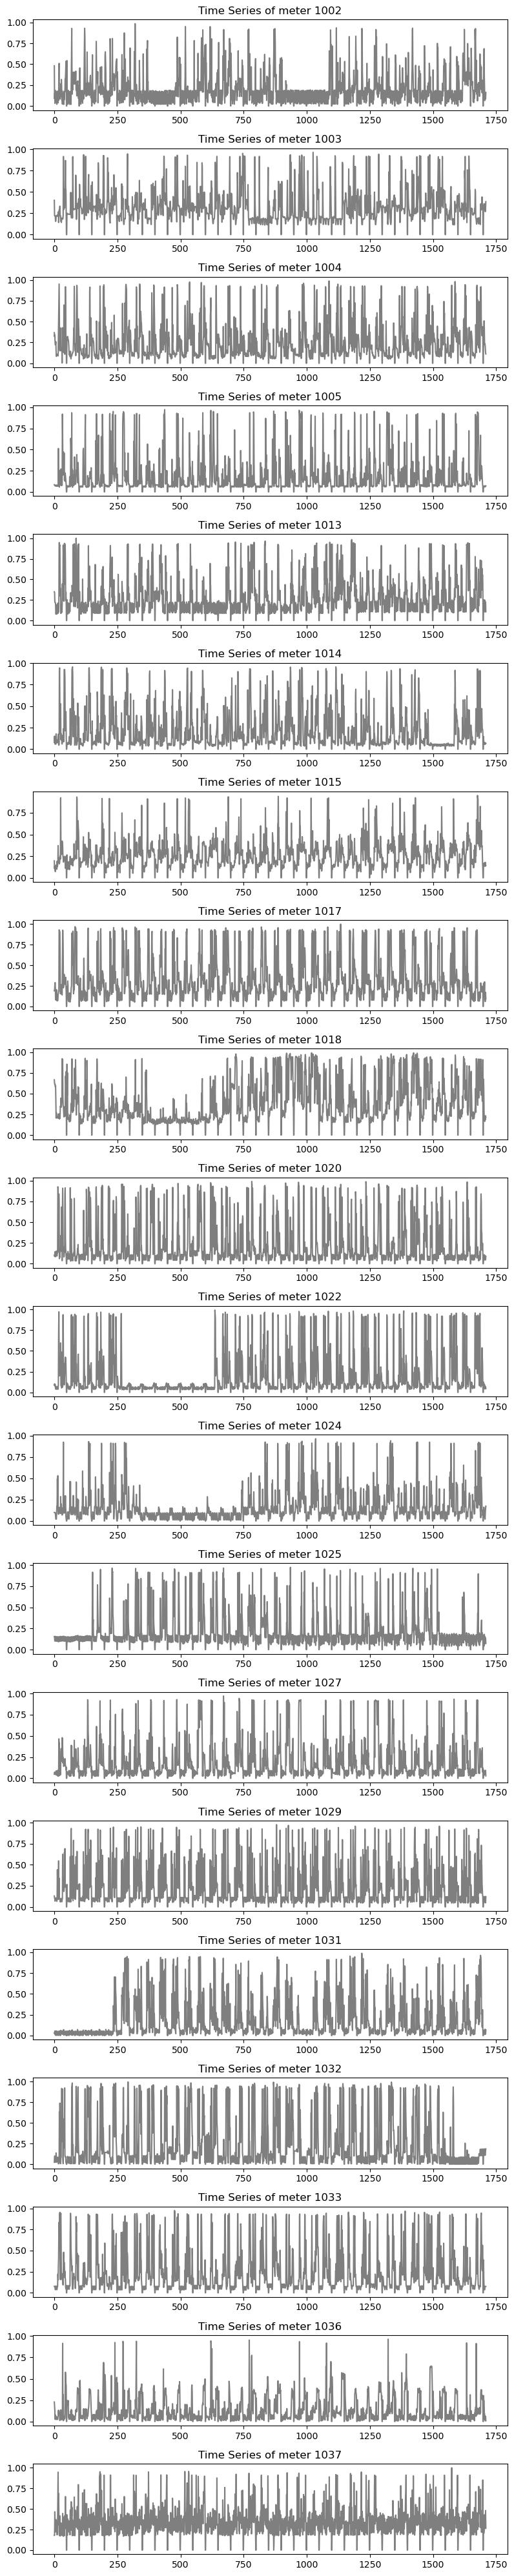

In [101]:
fig, axs = plt.subplots(len(X), 1, figsize=(8, 2 * len(X))) 

for yi in range(len(X)):
    axs[yi].plot(X[yi].ravel(), "k-", alpha=0.5)
    axs[yi].set_title(f"Time Series of meter {meter_ids[yi]}")
plt.tight_layout()
plt.show()

In [102]:
wcss = []
K = range(2, 8)

for k in K:
    km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0, max_iter=100)
    km.fit(X)
    wcss.append(km.inertia_)

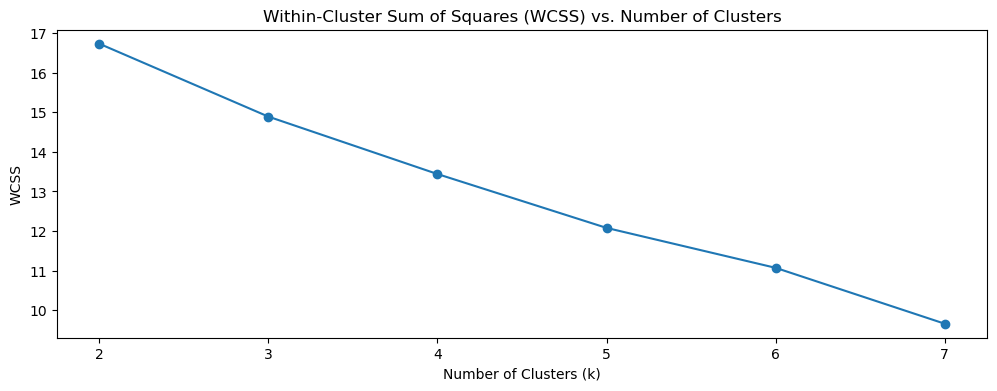

In [108]:
# Plot the WCSS values to find the optimal 'k'
plt.figure(figsize=(12, 4)) 
plt.plot(K, wcss, marker='o')
plt.title("Within-Cluster Sum of Squares (WCSS) vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [139]:
k = 3  # You should set this to your chosen number of clusters
km = TimeSeriesKMeans(n_clusters=k, n_init=2, metric="dtw", verbose=False, max_iter_barycenter=10, random_state=0)
cluster_labels = km.fit_predict(X)
cluster_labels 

array([1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2],
      dtype=int64)

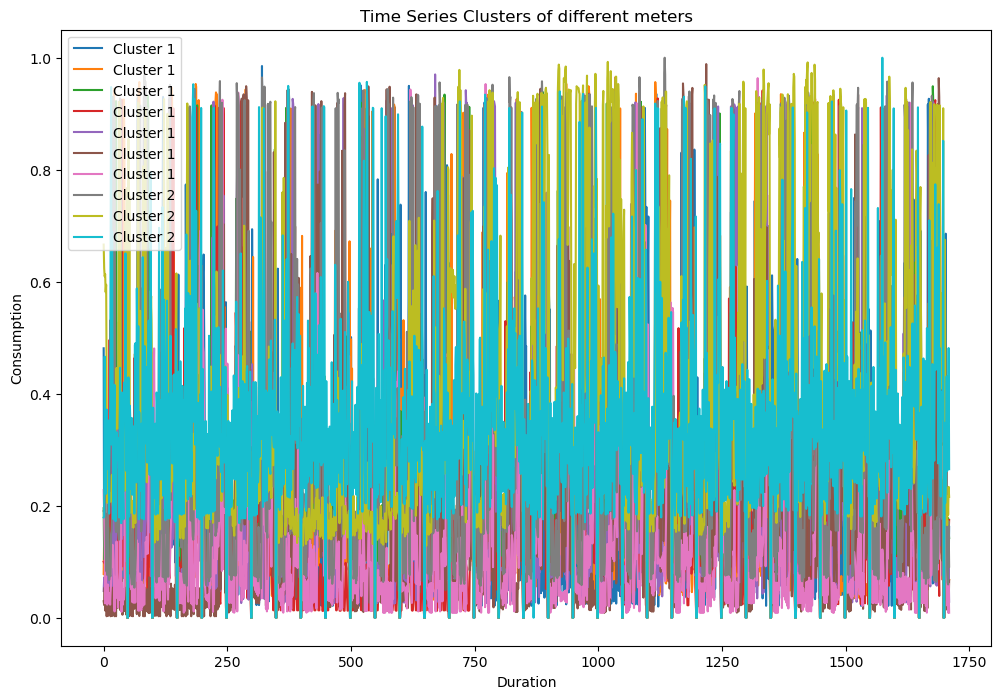

In [141]:
clusters_to_plot = [1, 2]  # Adjust as needed
plt.figure(figsize=(12, 8))

# Create a scatter plot with different colors for each cluster
for label in clusters_to_plot:
    cluster_data = [X[i] for i in range(len(X)) if cluster_labels[i] == label]
    for series in cluster_data:
        plt.plot(series, label=f'Cluster {label}')

plt.title("Time Series Clusters of different meters")
plt.xlabel("Duration")  # Replace with your actual label
plt.ylabel("Consumption")  # Replace with your actual label
plt.legend()
plt.show()

In [142]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.051329713272182075


In [143]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")
# A lower Davies-Bouldin Index indicates better clustering. The ideal value is 0, which means that clusters are well-separated 
# and do not overlap.
# A higher DBI suggests that clusters are less well-separated and have more overlap

Davies-Bouldin Index: 3.2362282769894875
